<a href="https://colab.research.google.com/github/priya030500/a3/blob/master/Assignment/Priyadarshini%20M/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment** **3**


**Build** **CNN** **Model** **for** **Classification** **of** **Flowers**


1)Download the Dataset and Unzip the file


In [ ]:
!unzip "/content/Flowers-Dataset.zip"



Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

**2)Image** **Augmentation**


In [ ]:
# Import required lib

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Creating augmentation on training variable
train_datagen = ImageDataGenerator(rescale=1./255 , zoom_range = 0.2 , horizontal_flip=True,vertical_flip=True)




In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = "/content/flowers"

In [ ]:
splitfolders.ratio(input_folder,output='/content/flowers',
                   ratio=(.8,0,.2),
                   group_prefix=None)

Copying files: 4317 files [00:01, 2657.08 files/s]


In [ ]:
x_train=train_datagen.flow_from_directory("/content/flowers/test",
                                          target_size=(64,64),
                                          class_mode='categorical',
                                          batch_size=19)

NameError: ignored

In [ ]:
x_test=test_datagen.flow_from_directory("/content/flowers/train",
                                        target_size=(64,64),
                                        class_mode='categorical',
                                        batch_size=19)

Found 3452 images belonging to 5 classes.


In [ ]:
x_train.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

**3)Create** **Model**


In [ ]:
# Importing required lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()


**4)Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)**


In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer

**5)Compile The Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
len(x_train)
len(x_test)

In [ ]:
1238/24


51.583333333333336

In [ ]:
326/24


13.583333333333334

**6)Fit The Model**

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),
                    validation_data=x_test,
                    validation_steps=len(x_test),
                    epochs=20)

**7)Save The Model**

In [ ]:
model.save('Flowers.h6')


**8)Test The Model**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model.save('flowers.h6')


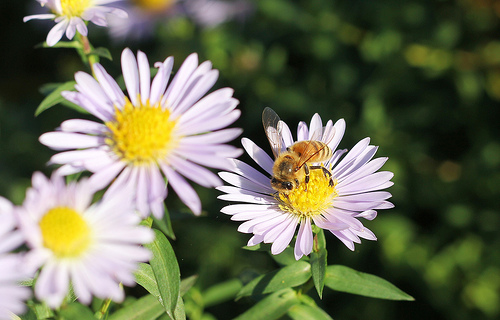

In [ ]:
img1 = image.load_img('/content/flowers/daisy/10555815624_dc211569b0.jpg') # Reading Image
img1 # Visualize the image

In [ ]:
x=image.img_to_array(img1)
x  # Converting image to array

array([[[ 11.,  16.,   9.],
        [ 11.,  16.,   9.],
        [ 11.,  18.,  10.],
        ...,
        [ 55.,  40.,  17.],
        [ 55.,  40.,  17.],
        [ 55.,  40.,  17.]],

       [[ 12.,  17.,  10.],
        [ 11.,  16.,   9.],
        [ 12.,  17.,  10.],
        ...,
        [ 57.,  43.,  16.],
        [ 59.,  43.,  18.],
        [ 59.,  45.,  19.]],

       [[ 13.,  18.,  11.],
        [ 12.,  17.,  10.],
        [ 12.,  17.,  10.],
        ...,
        [ 60.,  47.,  15.],
        [ 61.,  46.,  15.],
        [ 62.,  47.,  18.]],

       ...,

       [[209., 196., 213.],
        [210., 197., 214.],
        [212., 199., 216.],
        ...,
        [ 22.,  34.,  14.],
        [ 18.,  31.,  11.],
        [ 16.,  29.,  11.]],

       [[204., 194., 205.],
        [205., 195., 206.],
        [206., 196., 207.],
        ...,
        [ 20.,  32.,  12.],
        [ 19.,  30.,  13.],
        [ 18.,  29.,  12.]],

       [[196., 189., 196.],
        [197., 190., 197.],
        [199., 1

In [ ]:
x = np.expand_dims(x,axis=0)
x # Expanding dimensions

array([[[[ 11.,  16.,   9.],
         [ 11.,  16.,   9.],
         [ 11.,  18.,  10.],
         ...,
         [ 55.,  40.,  17.],
         [ 55.,  40.,  17.],
         [ 55.,  40.,  17.]],

        [[ 12.,  17.,  10.],
         [ 11.,  16.,   9.],
         [ 12.,  17.,  10.],
         ...,
         [ 57.,  43.,  16.],
         [ 59.,  43.,  18.],
         [ 59.,  45.,  19.]],

        [[ 13.,  18.,  11.],
         [ 12.,  17.,  10.],
         [ 12.,  17.,  10.],
         ...,
         [ 60.,  47.,  15.],
         [ 61.,  46.,  15.],
         [ 62.,  47.,  18.]],

        ...,

        [[209., 196., 213.],
         [210., 197., 214.],
         [212., 199., 216.],
         ...,
         [ 22.,  34.,  14.],
         [ 18.,  31.,  11.],
         [ 16.,  29.,  11.]],

        [[204., 194., 205.],
         [205., 195., 206.],
         [206., 196., 207.],
         ...,
         [ 20.,  32.,  12.],
         [ 19.,  30.,  13.],
         [ 18.,  29.,  12.]],

        [[196., 189., 196.],
       

In [ ]:
img=image.load_img("/content/flowers/daisy/10555815624_dc211569b0.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'daisy'